In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sb
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('airbnb_listings.csv')

df.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,experiences_offered,picture_url,host_id,...,calendar_last_scraped,number_of_reviews,review_scores_rating,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,none,https://a1.muscache.com/ac/pictures/67560560/c...,956883,...,2016-01-04,207,95.0,f,WASHINGTON,f,moderate,f,f,2
1,1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,none,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,...,2016-01-04,43,96.0,f,WASHINGTON,f,strict,t,t,6
2,2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,none,https://a2.muscache.com/ac/pictures/b4324e0f-a...,16708587,...,2016-01-04,20,97.0,f,WASHINGTON,f,strict,f,f,2
3,3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,none,https://a0.muscache.com/ac/pictures/94146944/6...,9851441,...,2016-01-04,0,0.0,f,WASHINGTON,f,flexible,f,f,1
4,4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,none,https://a1.muscache.com/ac/pictures/6120468/b0...,1452570,...,2016-01-04,38,92.0,f,WASHINGTON,f,strict,f,f,1


In [46]:
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics


In [67]:
df['id'].nunique()

3401

In [68]:
len(df)

3401

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        3401 non-null   int64  
 1   id                                3401 non-null   int64  
 2   listing_url                       3401 non-null   object 
 3   scrape_id                         3401 non-null   int64  
 4   last_scraped                      3401 non-null   object 
 5   name                              3401 non-null   object 
 6   description                       3401 non-null   object 
 7   experiences_offered               3401 non-null   object 
 8   picture_url                       3401 non-null   object 
 9   host_id                           3401 non-null   int64  
 10  host_url                          3401 non-null   object 
 11  host_verifications                3401 non-null   object 
 12  street

In [70]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'experiences_offered', 'picture_url', 'host_id',
       'host_url', 'host_verifications', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'review_scores_rating', 'requires_license',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
    

In [71]:
features_response = ['price','accommodates','bathrooms','bedrooms','beds','guests_included','review_scores_rating','calculated_host_listings_count']


In [72]:
corr = df[features_response].corr()
corr

,price,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating,calculated_host_listings_count
price,1.000000,0.645140,0.512414,0.627678,0.582827,0.387392,-0.024158,-0.050940
accommodates,0.645140,1.000000,0.531918,0.771022,0.858992,0.531012,0.037749,-0.028624
bathrooms,0.512414,0.531918,1.000000,0.607962,0.527172,0.296312,-0.001542,-0.000714
bedrooms,0.627678,0.771022,0.607962,1.000000,0.751107,0.455958,-0.014792,-0.048539
beds,0.582827,0.858992,0.527172,0.751107,1.000000,0.453079,0.011979,0.015554
guests_included,0.387392,0.531012,0.296312,0.455958,0.453079,1.000000,0.040140,-0.078592
review_scores_rating,-0.024158,0.037749,-0.001542,-0.014792,0.011979,0.040140,1.000000,-0.024061
calculated_host_listings_count,-0.050940,-0.028624,-0.000714,-0.048539,0.015554,-0.078592,-0.024061,1.000000


<AxesSubplot:>

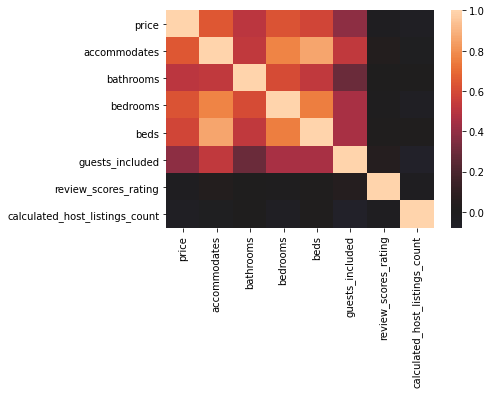

In [73]:
sb.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, center = 0)

In [105]:
#turn categorical columns into dummies
cat_columns = list(df.select_dtypes(include=['object']).columns)
    
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_',

                                                         drop_first=True, dummy_na=True)], axis=1)


In [106]:
TEST_SIZE = 0.3
RAND_STATE = 42

X = df.drop(columns = 'price')
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Columns: 20615 entries, Unnamed: 0 to require_guest_phone_verification_nan
dtypes: float64(7), int64(14), uint8(20594)
memory usage: 67.3 MB


In [108]:
#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 539.461, test: 2706.694
Random Forest R^2 train: 0.937, test: 0.645


In [74]:
df['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    713
Capitol Hill           510
Downtown               472
Central Area           332
Queen Anne             266
Ballard                211
West Seattle           171
Rainier Valley         142
University District    107
Beacon Hill             95
Cascade                 75
Northgate               71
Delridge                71
Lake City               59
Magnolia                53
Seward Park             44
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

In [75]:
df.shape

(3401, 54)

In [76]:
top_host = df['host_id'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 host with the most number of listings in Boston')

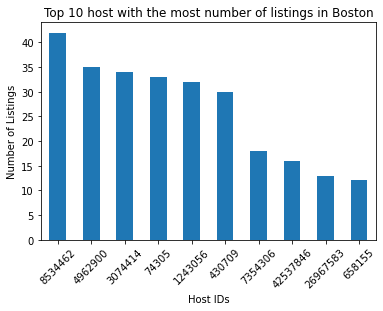

In [77]:
top_host.plot.bar(legend = False, rot = 45)
plt.xlabel('Host IDs')
plt.ylabel('Number of Listings')
plt.title('Top 10 host with the most number of listings in Boston')

In [78]:
neighbouthood = df['neighbourhood_group_cleansed'].value_counts()#df['neighbourhood'].value_counts().head(10)
neighbouthood = neighbouthood.drop(['Other neighborhoods'])
neighbouthood

Capitol Hill           510
Downtown               472
Central Area           332
Queen Anne             266
Ballard                211
West Seattle           171
Rainier Valley         142
University District    107
Beacon Hill             95
Cascade                 75
Northgate               71
Delridge                71
Lake City               59
Magnolia                53
Seward Park             44
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

Text(0.5, 1.0, 'Top 10 neighbourhood with the highet number of listings in Seattle')

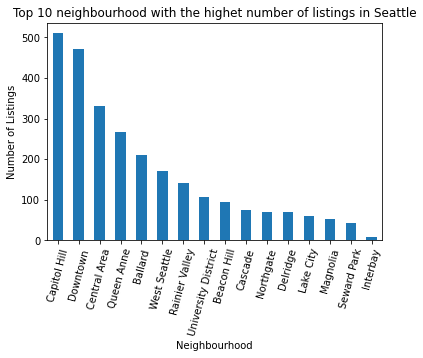

In [79]:
neighbouthood.plot.bar(legend = False, rot = 75)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Top 10 neighbourhood with the highet number of listings in Seattle')

In [80]:
top_3 = neighbouthood.index[:3].tolist()
top_3

['Capitol Hill', 'Downtown', 'Central Area']

In [84]:
stacked_bar_df = pd.DataFrame(df.loc[df['neighbourhood_group_cleansed'].isin(top_3) ].groupby(['neighbourhood_group_cleansed', 'property_type']).count()['id']).reset_index()
property_type_list = stacked_bar_df.property_type.unique().tolist()

stacked_bar_data = []

for property_type in property_type_list:
        stacked_bar_trace = go.Bar(name = property_type, x= top_3, y =stacked_bar_df[stacked_bar_df['property_type']== property_type]['id'].tolist())
        stacked_bar_data.append(stacked_bar_trace)
        
stacked_bar_layout = go.Layout(title = 'Property Type Count in Top 3 Most Neighborhoods with higher number of listing',
                   barmode = 'stack',
                  yaxis = dict(title='Count'))    
    
stacked_bar_fig = go.Figure(data=stacked_bar_data, layout=stacked_bar_layout)

stacked_bar_fig.show()

In [85]:
df['neighbourhood_group_cleansed'].value_counts()


Other neighborhoods    713
Capitol Hill           510
Downtown               472
Central Area           332
Queen Anne             266
Ballard                211
West Seattle           171
Rainier Valley         142
University District    107
Beacon Hill             95
Cascade                 75
Northgate               71
Delridge                71
Lake City               59
Magnolia                53
Seward Park             44
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

In [86]:
coord =df.loc[:,['longitude','latitude']]
coord.describe() 

,longitude,latitude
count,3401.000000,3401.000000
mean,-122.332890,47.629388
std,0.031683,0.042792
min,-122.417219,47.505088
25%,-122.354343,47.609798
50%,-122.328863,47.623883
75%,-122.310483,47.663040
max,-122.252230,47.733358


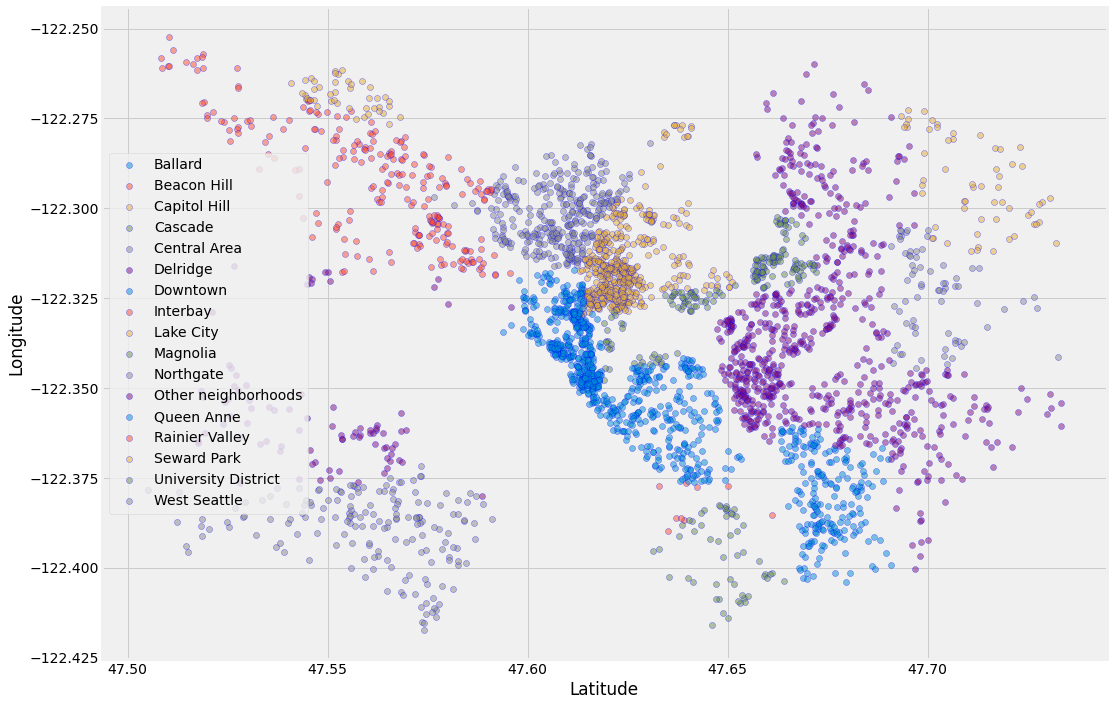

In [87]:
rng = np.random.RandomState(0)
colors = rng.rand(17)
plt.figure(figsize=(18,12))
plt.style.use('fivethirtyeight')
BBox = (47.505088, 47.733358,-122.417219, -122.252230)
#sg_map = plt.imread('map_bnw.png')
#plt.imshow(sg_map,zorder=0,extent=BBox)
#ax = plt.gca()
groups = df.groupby('neighbourhood_group_cleansed')
for name,group in groups :
    plt.scatter(group['latitude'],group['longitude'],label=name,alpha=0.5, edgecolors='b')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

In [88]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([47.629382,-122.333180],zoom_start=11.4)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)


In [89]:
df['property_type'].value_counts()

House              1556
Apartment          1512
Townhouse           106
Condominium          83
Bed & Breakfast      35
Loft                 34
Cabin                20
Other                16
Bungalow             12
Camper/RV             9
Boat                  6
Tent                  5
Treehouse             2
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

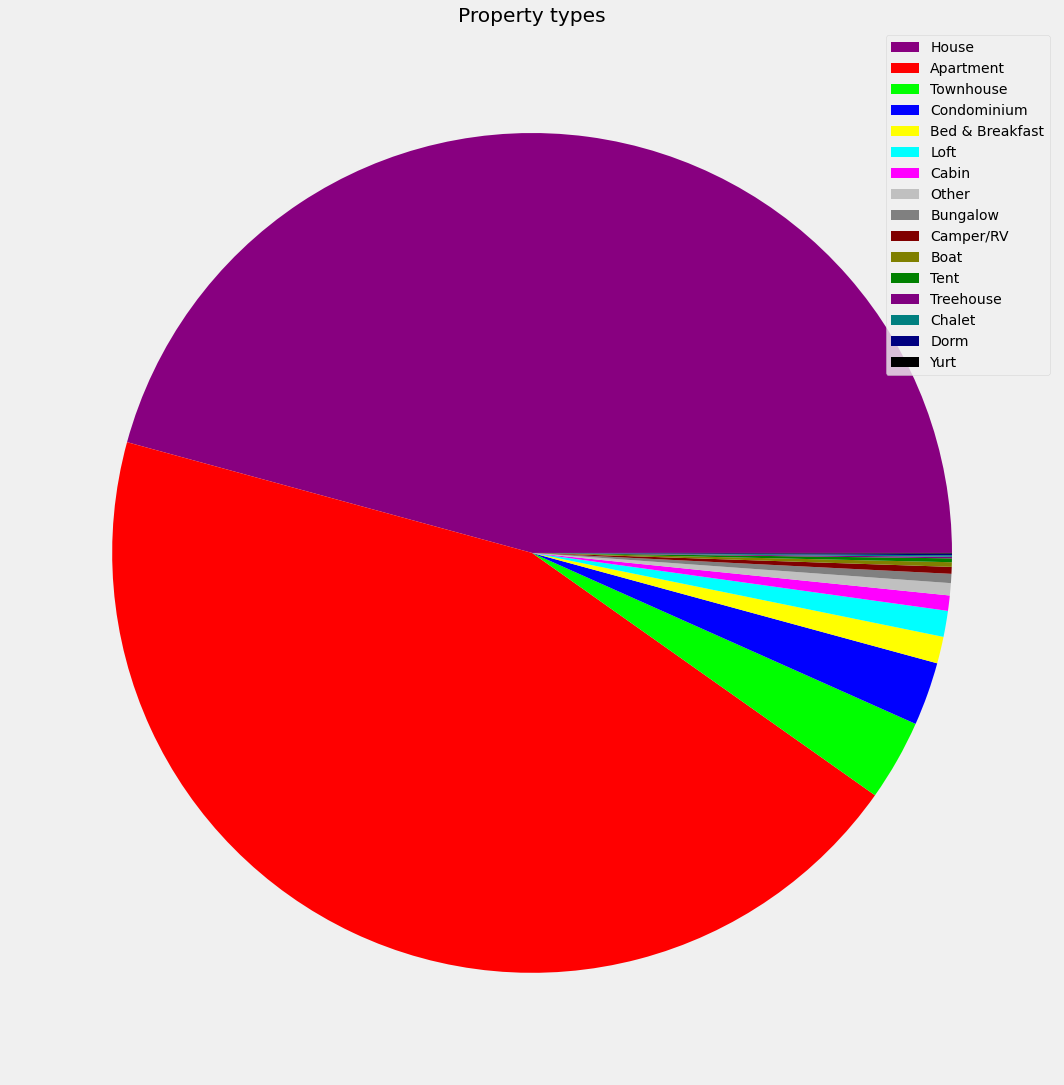

In [90]:
labels = df.property_type.value_counts().index
#colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b','#009fd5','#fc4f50','#e5ae58','#6d905f','#8b8b9b', '#008fd7','#fc4f70','#e7ae38','#7d904f','#2b8b8b','#008fd5']
colors = ['#880080', '#ff0000','#00ff00','#0000ff','#ffff00','#00ffff','#ff00ff','#c0c0c0','#808080','#800000','#808000','#008000','#800080','#008080','#000080','#000000']
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
shape = df.property_type.value_counts().values
plt.figure(figsize=(18,18))
plt.pie(shape, colors= colors, startangle=0)
plt.legend(labels)
plt.title('Property types')
plt.show()

In [91]:
df.property_type.value_counts().values

array([1556, 1512,  106,   83,   35,   34,   20,   16,   12,    9,    6,
          5,    2,    2,    2,    1], dtype=int64)

In [92]:
df.property_type.value_counts().index

Index(['House', 'Apartment', 'Townhouse', 'Condominium', 'Bed & Breakfast',
       'Loft', 'Cabin', 'Other', 'Bungalow', 'Camper/RV', 'Boat', 'Tent',
       'Treehouse', 'Chalet', 'Dorm', 'Yurt'],
      dtype='object')

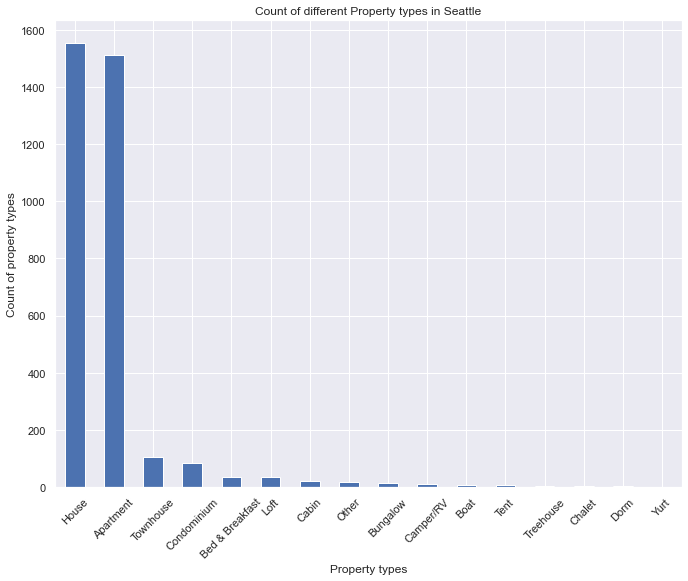

In [93]:
property_= df['property_type'].value_counts()
sb.set(rc={'figure.figsize':(10,8)})
viz_bar = property_.plot(kind='bar')
viz_bar.set_title('Count of different Property types in Seattle')
viz_bar.set_xlabel('Property types')
viz_bar.set_ylabel('Count of property types')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45);

<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

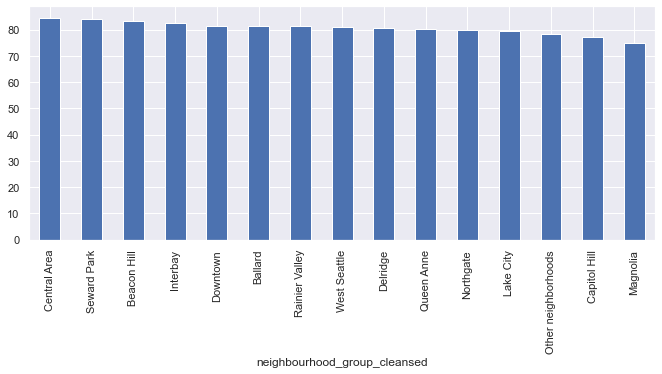

In [94]:
avgScorePerNeighbourhood = df.groupby('neighbourhood_group_cleansed').agg({'review_scores_rating':np.mean})
avgScorePerNeighbourhood = avgScorePerNeighbourhood.apply(lambda x: x.sort_values(ascending=False).head(15))
avgScorePerNeighbourhood.plot.bar(figsize=(10,4), legend = False)
#plt.xlabel('Neighborhood Groups')


In [95]:
avgScorePerNeighbourhood

,review_scores_rating
neighbourhood_group_cleansed,
Central Area,84.623494
Seward Park,84.227273
Beacon Hill,83.347368
Interbay,82.666667
Downtown,81.504237
Ballard,81.478673
Rainier Valley,81.394366
West Seattle,80.842105
Delridge,80.788732


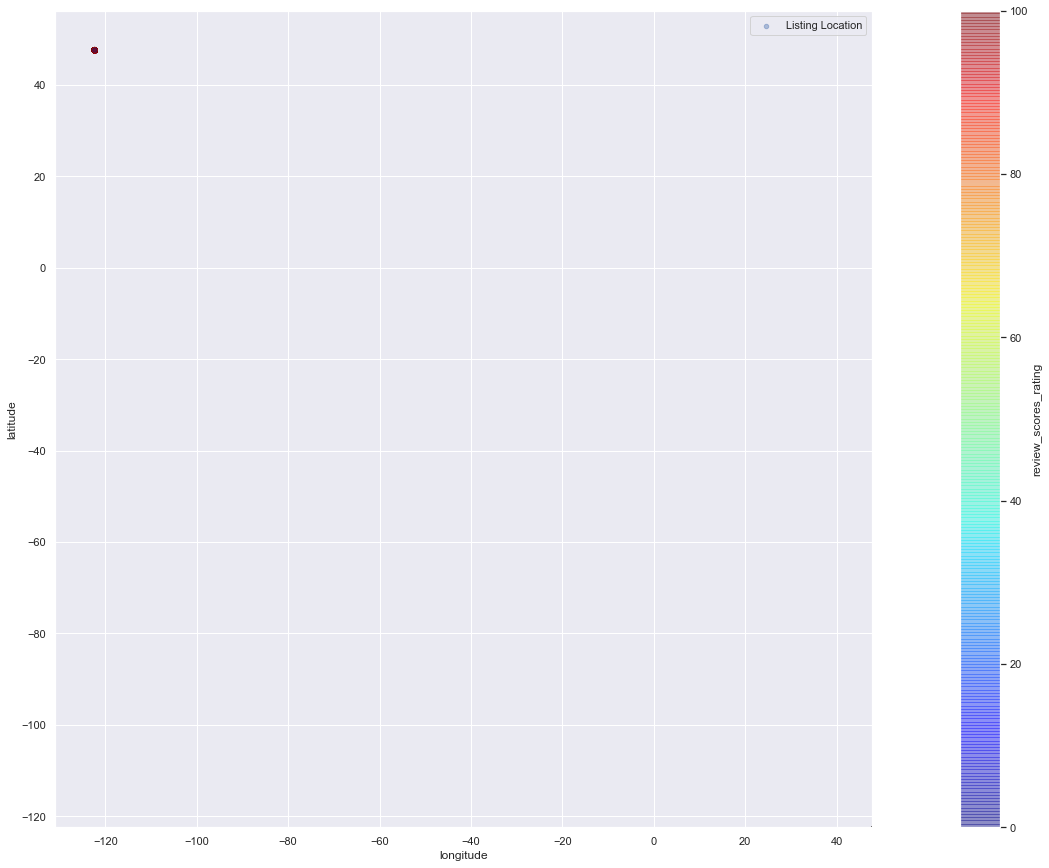

In [96]:
plt.figure(figsize=(28,14))
sg_map = plt.imread('seattle_map.png')
plt.imshow(sg_map,zorder=2,extent=BBox)
ax = plt.gca()
df.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='review_scores_rating', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

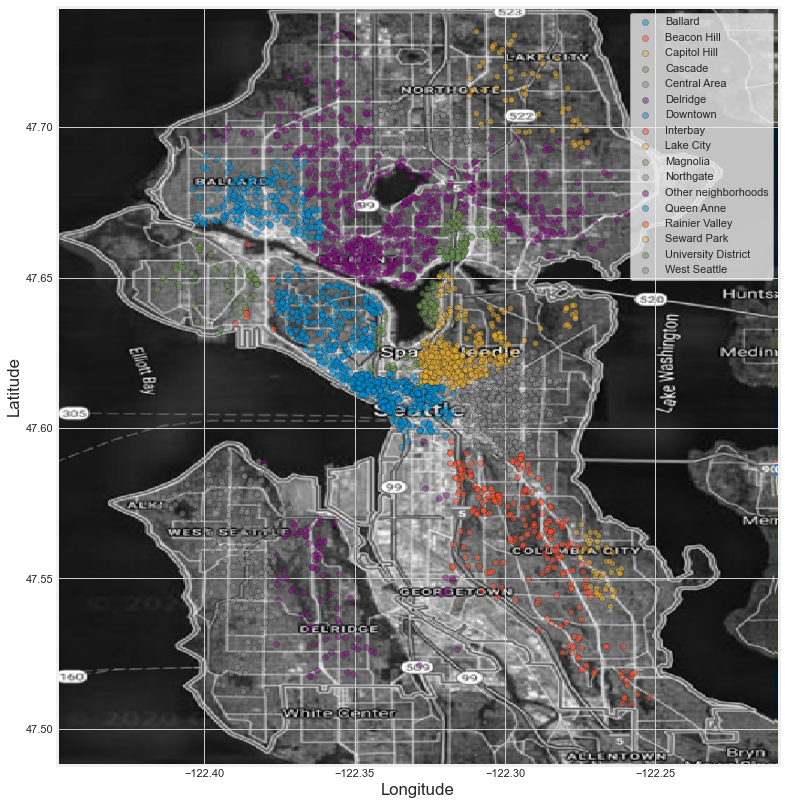

In [97]:
plt.figure(figsize=(28,13))
plt.style.use('fivethirtyeight')
BBox = (-122.448899, -122.20900, 47.487889, 47.73999)
sg_map = plt.imread('seattle_map.png')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca
groups = df.groupby('neighbourhood_group_cleansed')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()


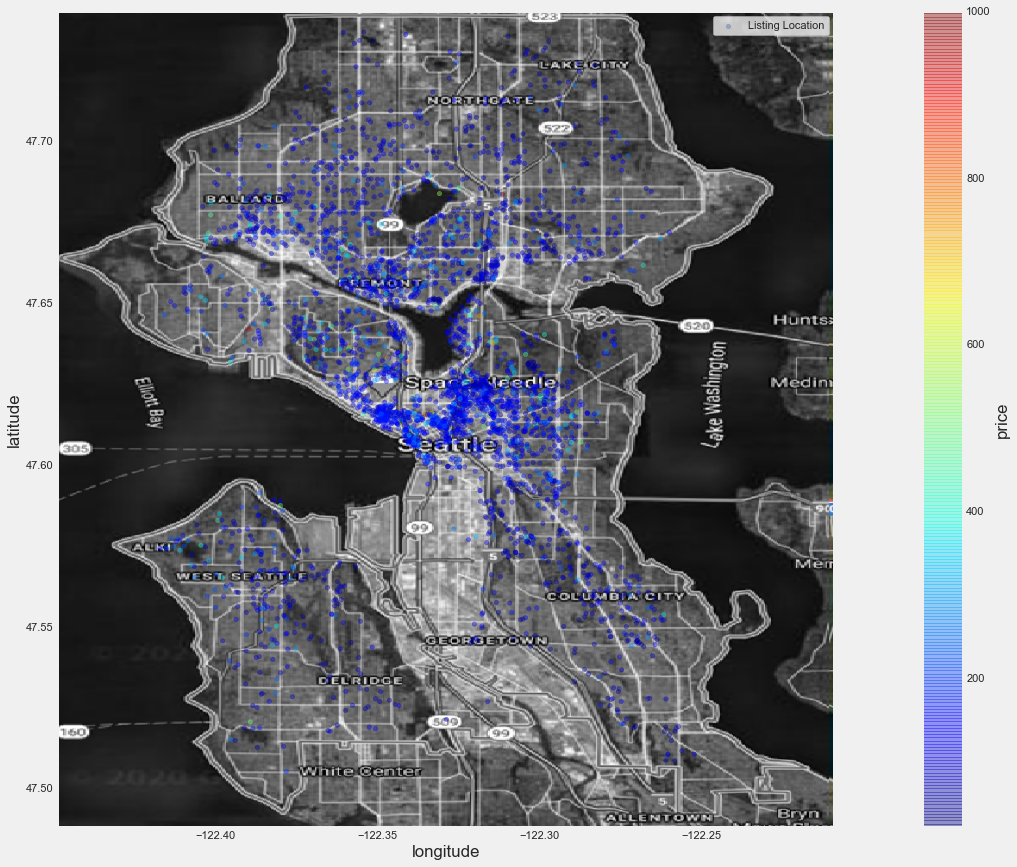

In [98]:
plt.figure(figsize=(28,14))
sg_map = plt.imread('seattle_map.png')
plt.imshow(sg_map,zorder=2,extent=BBox)
ax = plt.gca()
df.plot(kind='scatter',y='latitude',x='longitude',label='Listing Location', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

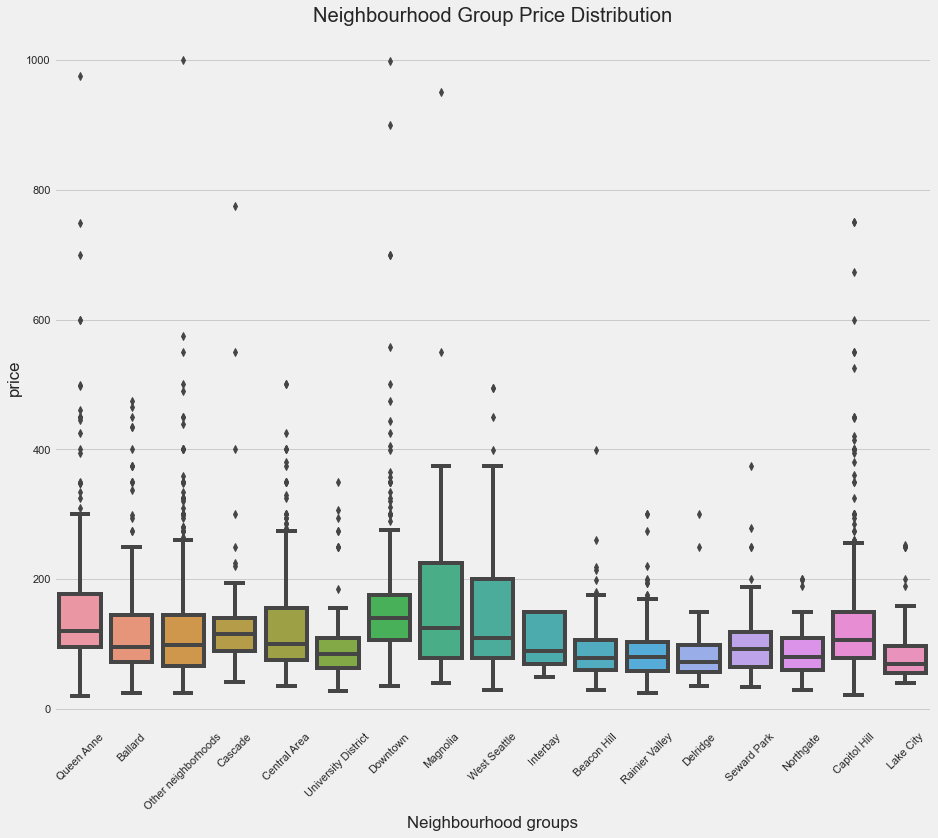

In [99]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
vis = sb.boxplot(y='price',x='neighbourhood_group_cleansed',data = df)
plt.title('Neighbourhood Group Price Distribution')
plt.xlabel('Neighbourhood groups')
vis.set_xticklabels(vis.get_xticklabels(), rotation=45)
plt.show()


In [100]:
avgPricePerNeighbourhood = df.groupby('neighbourhood_group_cleansed').agg({'price':np.mean})
avgPricePerNeighbourhood = avgPricePerNeighbourhood.apply(lambda x: x.sort_values(ascending=False).head(15))
avgPricePerNeighbourhood

,price
neighbourhood_group_cleansed,
Magnolia,178.113208
Queen Anne,160.951128
Downtown,156.866525
West Seattle,144.321637
Cascade,138.200000
Capitol Hill,131.866667
Central Area,129.569277
Ballard,125.028436
Other neighborhoods,120.718093


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

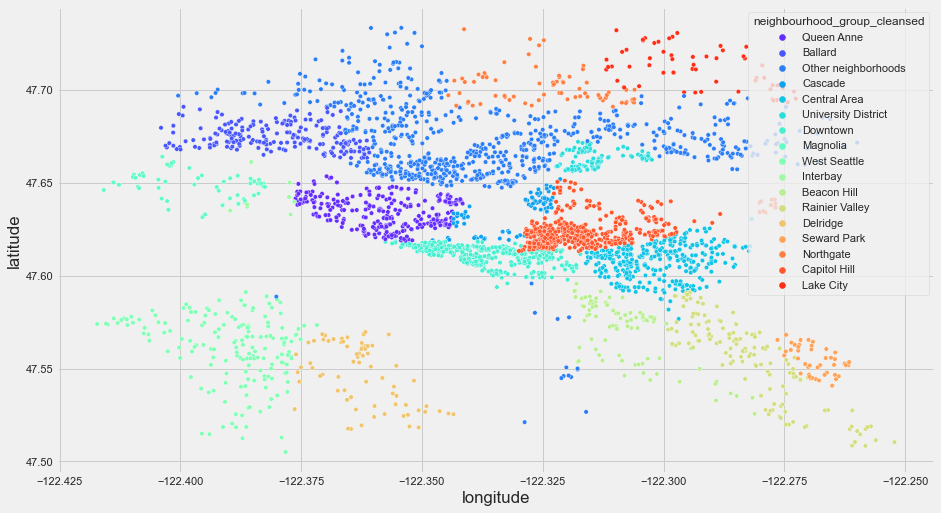

In [101]:
plt.figure(figsize=(14,8))
sb.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group_cleansed'], s=20, palette="rainbow") 

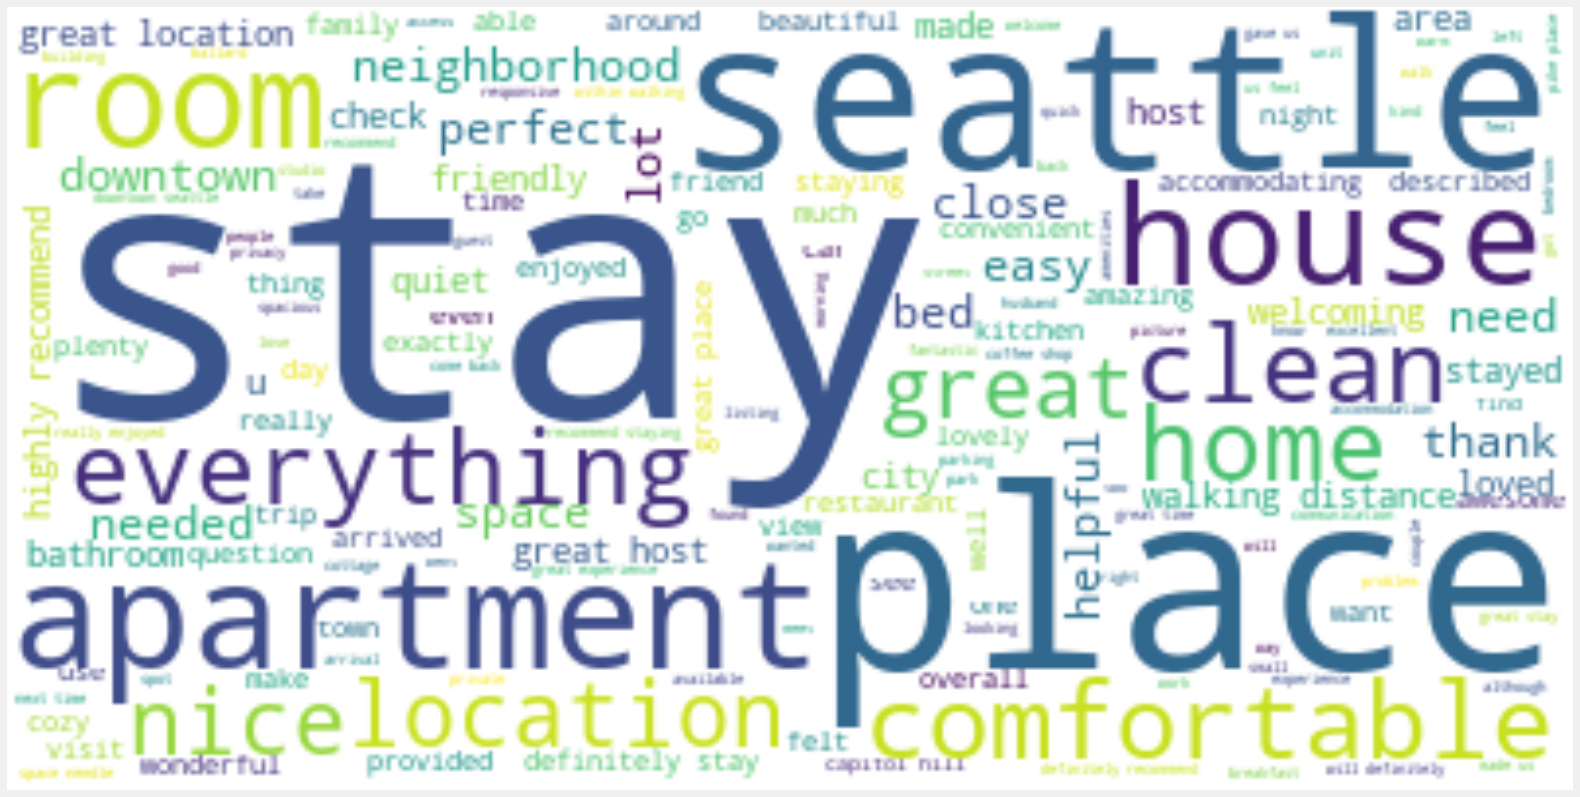

In [103]:
df_review = pd.read_csv('reviews.csv')
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in df_review.comments)
#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()